#                                               Projeto WPT

### Diagrama do modelo eletrodinâmico do circuito WPT

![alt text](eq.png "Alo")

$$ Z_{eq} = \frac{\frac{1}{j\omega{C}_{2}}R_{C}}{\frac{1}{j\omega{C}_{2}}+R_{C}} = \frac{R_{C}}{j\omega{R}_{C}{C}_{2} +1} $$

$$ \hat{V}_{f} = R_{1}\hat{I}_{1} + j\omega{L}_{1}\hat{I}_{1} + \frac{1}{j\omega{C}_{1}}\hat{I}_{1} - j\omega M\hat{I}_{2} $$

$$ j\omega M\hat{I}_{1} =  j\omega{L}_{2}\hat{I}_{2} + R_{2}\hat{I}_{2} + Z_{eq}\hat{I}_{2}$$

$$\begin{bmatrix} {R}_{1} + j\omega{L}_{1} + \frac{1}{j\omega{C}_{1}} & - j\omega M  \\ - j\omega M & j\omega{L}_{2} + R_{2} + Z_{eq}   \end{bmatrix} \begin{bmatrix} \hat{I}_{1} \\ \hat{I}_{2}  \end{bmatrix} = \begin{bmatrix} \hat{V}_{f} \\ 0  \end{bmatrix}$$

### Modelo Numérico

Módulos Utilizados

In [93]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

Variáveis do Sistema:  $R_C= 10\Omega$, $R_1=0,5\Omega$, $R_2=0,5\Omega$, $L_1=300 mH$, $L_2=300 mH$, $C_1 = 1\mu F$, $C_2 = 1\mu F$ e $k=0,5$

In [94]:
# Implementação Variáveis
R_1 = 0.5
R_2= R_1
L_1 = 300e-3
L_2 = L_1
C_1 = 1e-6
C_2 = C_1
V1 = 5
Lista_K = np.arange(0,1,0.001)
RC= 10

In [95]:
#Adotando W referencial para descobrir a frequencia quando M tende a 0
W_ref = (1/(L_1*C_1))**(0.5)
#Cálculo da Frequência Referente
F_ref = W_ref/(2*np.pi)

Lista_Frequencias =  np.arange(1,10000, 1)

In [96]:
#Função que calcula as correntes do Transformador
def CalcularTransformador(Z_L1,Z_L2,Z_C1,Z_C2,Z_EQ,ZM):
    """ 
    Função que devolve as correntes I1 e I2 em uma lista
    """
    Z=np.array([[R_1+Z_L1+Z_C1, -ZM],
                [-ZM, Z_L2+R_2+Z_EQ]])
    V=np.array([V1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1]

In [97]:
#Função que devolve as correntes para uma frequência e constante de acoplamento qualquer
def devolve_correntes(f,k):
    """ 
    Função Utilizada no loop que variamos o k (fator de acoplamento) percorrendo Lista_K e mantendo a frequência constante
    """
    M = k*np.sqrt(L_1*L_2)
    w = np.pi*2*f
    Z_L1 = 0 + w*L_1*1j
    Z_L2 = 0 + w*L_2*1j
    Z_C1 = 0 - (1/(w*C_1))*1j
    Z_C2 = 0 - (1/(w*C_2))*1j
    Z_EQ = (RC/(RC*C_2*w*1j+1))
    ZM = 0 + (w*M)*1j
    I1,I2 = CalcularTransformador(Z_L1,Z_L2,Z_C1,Z_C2,Z_EQ,ZM)
    return I1,I2
    

In [98]:
#Acha uma lista de correntes para um range de frequências e para uma constante de acoplamento qualquer
def acha_I1_I2(k):
    """
    Função utilizada para devolver o valor de I1 e I2. Aqui passamos o valor de k e percorremos lista_frequencias para achar a frequência de ressonância
    """

    Lista_I1 = []
    Lista_I2 = []
    #Loop para achar diferentes valores de I1 e I2
    for f in Lista_Frequencias:
        I1,I2 = devolve_correntes(f,k)
        Lista_I1.append(np.abs(I1))
        Lista_I2.append(np.abs(I2))
    array_final = np.column_stack((Lista_I1, Lista_I2))
    return array_final


In [99]:
#Função para escrever no gráfico
def annot_max(x,y, ax=None):
    """ 
    Função que recebe coordenadas e desenha 
    """
    xmax = max(x)
    ymax = max(y)
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

### Gráficos das Correntes x Frequência


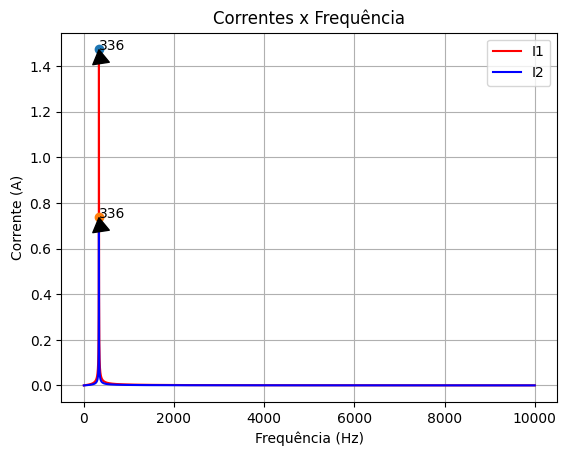

In [100]:
list_correntes = acha_I1_I2(0.5)
I1 = list_correntes[:,0]
I2 = list_correntes[:,1]


I1max, I2max = np.max(I1), np.max(I2)
indexI1, indexI2 = list(I1).index(I1max), list(I2).index(I2max)
#Descobre a respectiva frequência para corrente máxima
fmax1,fmax2 = Lista_Frequencias[indexI1],Lista_Frequencias[indexI2]
#Plota o gráfico
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Lista_Frequencias,I1,'r', label = ("I1"))
plt.plot(Lista_Frequencias,I2,'b', label = ("I2"))
plt.plot(fmax1,I1max, "-o")
plt.plot(fmax2,I2max, "-o")
ax.annotate(f'{int(fmax1)}', xy=(fmax1, I1max), xytext=(fmax1+10, I1max),
            arrowprops=dict(facecolor='black', shrink=0.1,width=1,headlength=10),
            )
ax.annotate(f'{int(fmax2)}', xy=(fmax2, I2max), xytext=(fmax2+10, I2max),
            arrowprops=dict(facecolor='black', shrink=0.1,width=1,headlength=10),
            )
plt.legend()
plt.title('Correntes x Frequência')
plt.xlabel("Frequência (Hz)")
plt.ylabel("Corrente (A)")
plt.grid(True)
plt.show()


Variando a constante de acoplamento K com frequencia fixada em 335Hz :

In [101]:
#Para uma frequência constante foi variada a constante de acoplamento
Frequencia = 335
lista_I1 = []
lista_I2 = []
for k in Lista_K:
    I1,I2 = devolve_correntes(Frequencia,k)
    lista_I1.append(np.abs(I1))
    lista_I2.append(np.abs(I2))
    

    

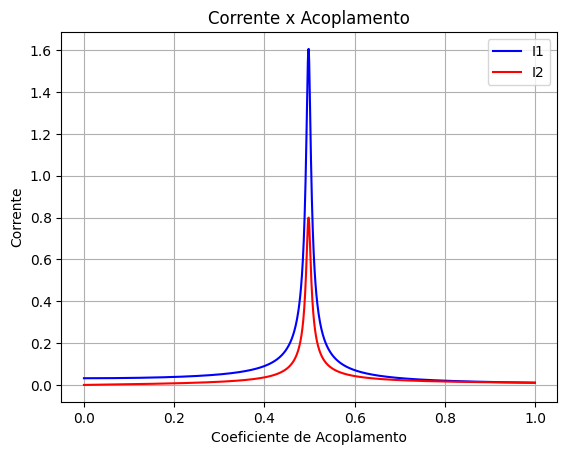

In [102]:
#Plota a figura
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Lista_K,lista_I1,'b',label = ("I1"))
plt.plot(Lista_K,lista_I2,'r',label = ("I2"))
plt.legend()
plt.title('Corrente x Acoplamento')
plt.ylabel("Corrente")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()

### Gráficos das Potências

In [103]:
#Função que calcula potência em função de V e I
def potencia(Veq, Ieq):
    S = (Veq/sqrt(2))*(Ieq/sqrt(2)).conjugate()
    return S.real
#Função que calcula potência em função de I do resistor e R
def potencia_resistor(Ir,R):
    S =R*(Ir/sqrt(2))*(Ir/sqrt(2)).conjugate()
    return S.real


In [104]:
#Calcula as potências para diferentes frequências
k = 0.5
lista_entradas = []
lista_saidas = []
lista_ganho =[]
for f in Lista_Frequencias:
    I1,I2 = devolve_correntes(f,k)
    S_entrada = potencia(V1, I1)
    lista_entradas.append(S_entrada.real)
    w = np.pi*2*f
    Z_C2 = 0 - (1/(w*C_2))*1j
    Z_RC = 10
    I3 = (I2*Z_C2)/(Z_RC+Z_C2)
    S_saida = potencia_resistor(I3,RC)
    lista_saidas.append(S_saida.real)
    ganho = (S_saida.real/S_entrada.real)
    lista_ganho.append(ganho*100)

3.85192054700213e-11 2.871910748187002e-10
5.635954064138377e-10 1.5788264673408065e-09
2.4972721523365204e-09 4.843243624682214e-09
6.719352666275533e-09 1.1004531393403002e-08
1.3773041747630048e-08 2.063344330552433e-08
2.3879444171907793e-08 3.396262157845005e-08
3.706427156113157e-08 5.10196441748349e-08
5.32664054546453e-08 7.174102024852459e-08
7.240009399099246e-08 9.603749922079567e-08
9.438304533711761e-08 1.238235702307904e-07
1.1914620814170852e-07 1.5502773233128333e-07
1.4663534187267693e-07 1.8959414380427905e-07
1.7680950612684855e-07 2.274810363276716e-07
2.096387436202333e-07 2.686582825206438e-07
2.4510184444024337e-07 3.131050488611877e-07
2.831844696658272e-07 3.6080782599759036e-07
3.2387766888607415e-07 4.117588727126263e-07
3.6717674227344947e-07 4.6595502172802626e-07
4.130803788927086e-07 5.233967756122673e-07
4.615900076449496e-07 5.840876260092563e-07
5.127093086971212e-07 6.4803354142934e-07
5.664438449854732e-07 7.152425811696152e-07
6.228007833360191e-07 

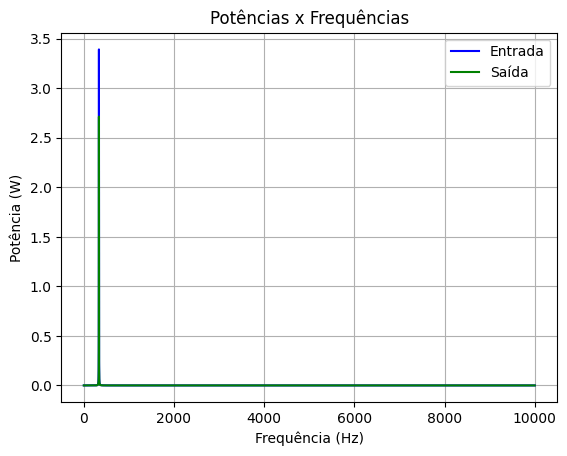

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Lista_Frequencias,lista_entradas,'b',label = ("Entrada"))
plt.plot(Lista_Frequencias,lista_saidas,'g',label = ("Saída"))
plt.legend()
plt.title('Potências x Frequências')
plt.ylabel("Potência (W)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Eficiência x Frequência

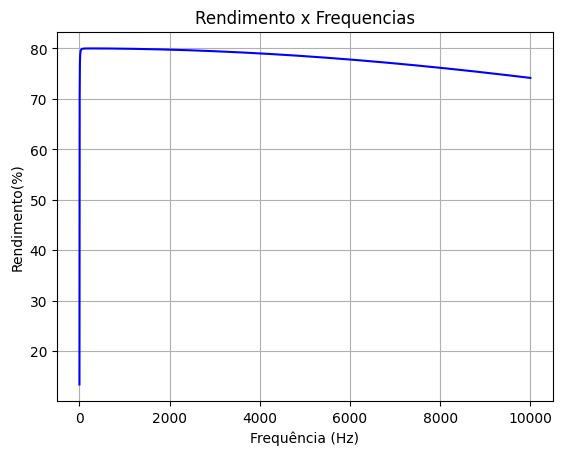

In [106]:
plt.plot(Lista_Frequencias,lista_ganho,'b')
plt.title('Rendimento x Frequencias')
plt.ylabel("Rendimento(%)")
plt.xlabel("Frequência (Hz)")
plt.grid(True)
plt.show()

### Gráfico Tensão na Carga x K

In [107]:
#Adotando W referencial para descobrir a frequencia quando M tende a 0
W_ref = (1/(L_1*C_1))**(0.5)
#Cálculo da Frequência Referente
F_ref = W_ref/(2*np.pi)
#Varia a constante de acomplamento mantendo a frequência de referência
lista_V2 = []
for k in Lista_K:
    I1,I2 = devolve_correntes(F_ref,k)
    w = np.pi*2*F_ref
    Z_C2 = 0 - (1/(w*C_2))*1j
    Z_RC = 10
    I3 = (I2*Z_C2)/(Z_RC+Z_C2)
    lista_V2.append(I3*RC)


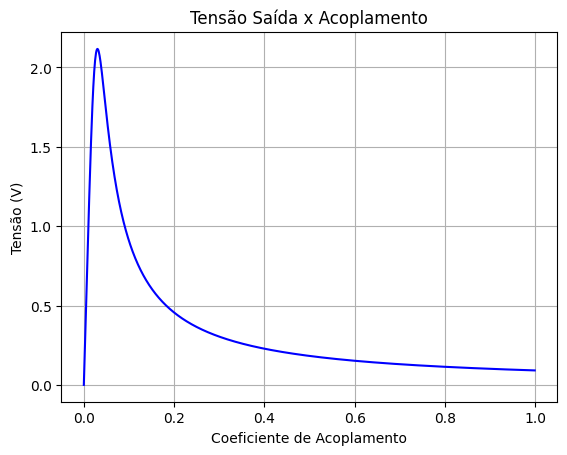

In [108]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(Lista_K,np.abs(lista_V2),'b')
plt.title('Tensão Saída x Acoplamento')
plt.ylabel("Tensão (V)")
plt.xlabel("Coeficiente de Acoplamento")
plt.grid(True)
plt.show()